<a href="https://colab.research.google.com/github/uthanda-vinayagam/TITANIC-SURVIVAL-PREDICTION.IPYNB/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


from google.colab import files
uploaded = files.upload()


df = pd.read_csv("titanic.csv")
df.head()


Saving titanic.csv to titanic.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:

columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


df['Age'] = df['Age'].fillna(df['Age'].median())

if df['Embarked'].isnull().sum() > 0:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])


df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


In [ ]:

X = df.drop('Survived', axis=1)
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("✅ Model Trained")


✅ Model Trained


In [ ]:

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2%}")


✅ Accuracy: 100.00%


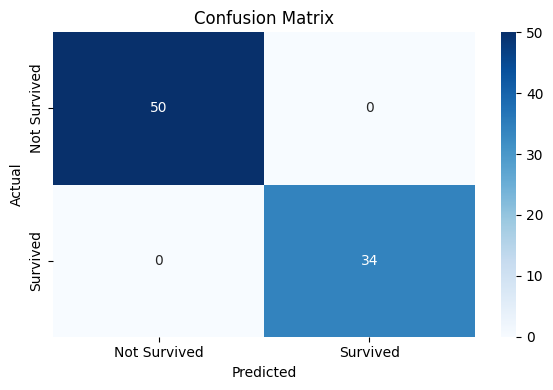

In [ ]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


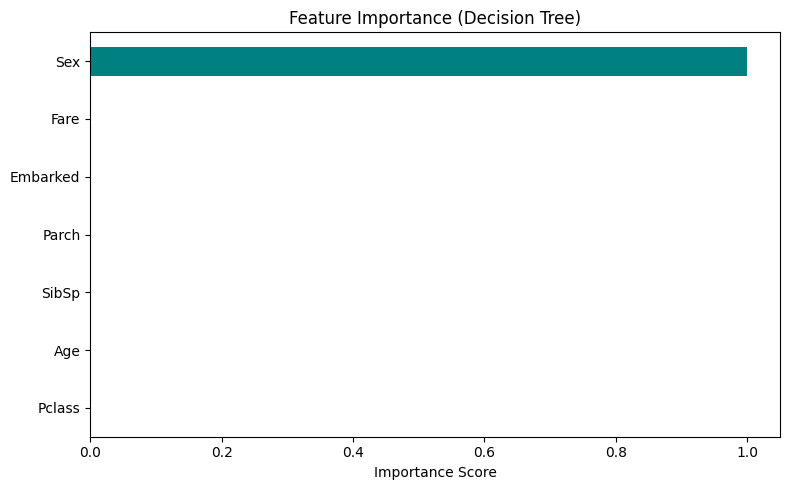

In [ ]:

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)


plt.figure(figsize=(8, 5))
importances.plot(kind='barh', color='teal')
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


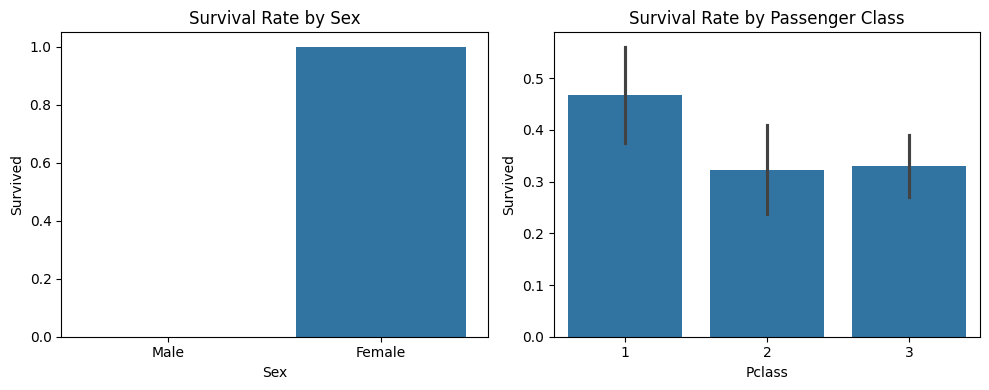

In [ ]:

df_viz = X.copy()
df_viz['Survived'] = y

plt.figure(figsize=(10, 4))


plt.subplot(1, 2, 1)
sns.barplot(data=df_viz, x='Sex', y='Survived', estimator=np.mean)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Survival Rate by Sex")


plt.subplot(1, 2, 2)
sns.barplot(data=df_viz, x='Pclass', y='Survived', estimator=np.mean)
plt.title("Survival Rate by Passenger Class")
plt.tight_layout()
plt.show()


In [ ]:
import os


os.makedirs("output", exist_ok=True)


In [ ]:

results_df = pd.DataFrame({
    'PassengerId': X_test.index,
    'Prediction': y_pred,
    'Actual': y_test
})


import os
os.makedirs("output", exist_ok=True)


results_df.to_csv("output/predictions.csv", index=False)
print("✅ Predictions saved to: output/predictions.csv")


✅ Predictions saved to: output/predictions.csv


In [ ]:

results_df.to_csv("output/predictions.csv", index=False)
print("✅ Predictions saved to: output/predictions.csv")


✅ Predictions saved to: output/predictions.csv


In [ ]:
import joblib
loaded_model = joblib.load("output/decision_tree_model.pkl")


loaded_model.predict(X_test)



array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
import joblib


joblib.dump(model, "output/decision_tree_model.pkl")
print("✅ Model saved.")


✅ Model saved.


In [ ]:

model = joblib.load("output/decision_tree_model.pkl")


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import joblib
import os


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


os.makedirs("output", exist_ok=True)


joblib.dump(model, "output/decision_tree_model.pkl")
print("✅ Model saved as: output/decision_tree_model.pkl")


✅ Model saved as: output/decision_tree_model.pkl


In [ ]:

loaded_model = joblib.load("output/decision_tree_model.pkl")


y_pred_loaded = loaded_model.predict(X_test)


from sklearn.metrics import accuracy_score
print("✅ Accuracy with loaded model:", accuracy_score(y_test, y_pred_loaded))


✅ Accuracy with loaded model: 1.0
